In [1]:
import matplotlib as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras

In [3]:
builder=tfds.builder('rock_paper_scissors')
info=builder.info

info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path='C:\\Users\\mehdi\\tensorflow_datasets\\rock_paper_scissors\\3.0.0',
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    splits={
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
)

## Prepare data

In [127]:
ds_train =tfds.load(name='rock_paper_scissors',split='train') #It's in the info so we can call it
ds_test=tfds.load(name='rock_paper_scissors',split='test')
#We could do tfds.disable_progress_bar() to hide the progress

## Show examples

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


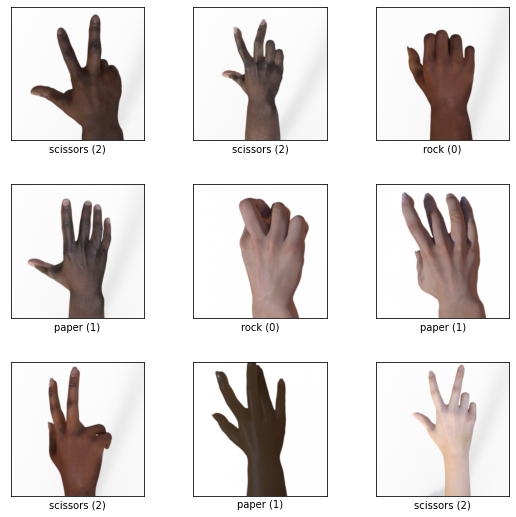

In [128]:
fig=tfds.show_examples(info,ds_train)

## Additional data prep

In [129]:
train_images=[example['image'] for example in ds_train] #example['image'] is how you access tfds dataset

In [90]:
type(train_images[0])

tensorflow.python.framework.ops.EagerTensor

so we change it to numpy format and also reduce the 3 dimensional color thingy

In [133]:
train_images=np.array([example['image'].numpy()[:,:,0] for example in ds_train]) #We only picked RED at [:,:,0]

In [92]:
type(train_images[0])

numpy.ndarray

In [93]:
train_images.shape

(2520, 300, 300)

### Train and test datasets:

In [130]:
train_labels=np.array([example['label'].numpy() for example in ds_train])

test_images=np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels=np.array([example['label'].numpy() for example in ds_test])


In [131]:
test_images.shape

(372, 300, 300)

## Reshaping data for model 

In [134]:
train_images=train_images.reshape(2520, 300, 300,1) #from (2520, 300, 300)
test_images=test_images.reshape(372, 300, 300, 1)

In [97]:
train_images.dtype

dtype('uint8')

we dont want integers, so we change it to float

In [135]:
train_images=train_images.astype('float32')
test_images=test_images.astype('float32')

train_images/=255   #This scaled every value between 0 and 1
test_images/=255

In [137]:
print(train_images.dtype,train_images[0],test_images[0].shape) 

float32 [[[0.99607843]
  [0.99215686]
  [0.99607843]
  ...
  [0.9843137 ]
  [0.98039216]
  [0.98039216]]

 [[0.99607843]
  [0.99607843]
  [0.99215686]
  ...
  [0.98039216]
  [0.9843137 ]
  [0.9764706 ]]

 [[0.99607843]
  [0.99607843]
  [0.99607843]
  ...
  [0.9843137 ]
  [0.98039216]
  [0.9882353 ]]

 ...

 [[0.9882353 ]
  [0.9843137 ]
  [0.9882353 ]
  ...
  [0.96862745]
  [0.9764706 ]
  [0.972549  ]]

 [[0.99215686]
  [0.99215686]
  [0.9843137 ]
  ...
  [0.972549  ]
  [0.972549  ]
  [0.972549  ]]

 [[0.9882353 ]
  [0.99215686]
  [0.9882353 ]
  ...
  [0.972549  ]
  [0.96862745]
  [0.98039216]]] (300, 300, 1)


So all good!

## Train a network (basic approach)

In [136]:
model=keras.Sequential([
    keras.layers.Flatten(), #transforms (300,300,1) to one column of 90000
    keras.layers.Dense(512,activation='relu'), #We dont add input_shape 
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

model.fit(train_images,train_labels,epochs=5,batch_size=32)

Epoch 1/5
79/79 [==============================] - 13s 150ms/step - loss: 41.1976 - accuracy: 0.3527
Epoch 2/5
79/79 [==============================] - 12s 150ms/step - loss: 1.3775 - accuracy: 0.6582
Epoch 3/5
79/79 [==============================] - 11s 136ms/step - loss: 1.1551 - accuracy: 0.6839
Epoch 4/5
79/79 [==============================] - 11s 134ms/step - loss: 0.4704 - accuracy: 0.8349
Epoch 5/5
79/79 [==============================] - 11s 133ms/step - loss: 0.3661 - accuracy: 0.8724


In [138]:
model.evaluate(test_images,test_labels)

12/12 [==============================] - 0s 24ms/step - loss: 3.1259 - accuracy: 0.4435


[3.1259148120880127, 0.44354838132858276]

## Train a Network (convolutional approach)

In [141]:
model=keras.Sequential([
    keras.layers.Conv2D(64,3,activation='relu',input_shape=(300,300,1)), #filters, kernel_size(window size), strides(movement of window by default is 1)
    keras.layers.Conv2D(32,3,activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(3,activation='softmax')
])

model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

model.fit(train_images,train_labels,epochs=5,batch_size=32)

Epoch 1/5
 6/79 [=>............................] - ETA: 7:36 - loss: 48.2196 - accuracy: 0.3372

KeyboardInterrupt: 

This will take FOREVER. This is why we use google colab

After doing it on google colab, Our train was 100% but test was 45% so we are OVERFITTING

so we modify:

In [ ]:
model=keras.Sequential([
    keras.layers.AveragePooling2D(6,3,input_shape=(300,300,1)),#We make 6 by6 pixels and we move it by 3, making it 100x100
    keras.layers.Conv2D(64,3,activation='relu'), #filters, kernel_size(window size), strides(movement of window by default is 1)
    keras.layers.Conv2D(32,3,activation='relu'),
    keras.layers.MaxPool2D(2,2), #Smaller parameter size
    keras.layers.Dropout(0.5), #0.5 in research is a good common rate
    keras.layers.Flatten(),
    # keras.layers.Dense(128,activation='relu'), #another layer before we drop it to 3
    keras.layers.Dense(3,activation='softmax')
])

model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

model.fit(train_images,train_labels,epochs=5,batch_size=32)



Still not that great, so we should use automatic tuner

## Hyperparameter Tuning:

In [ ]:
# pip install -U keras-tuner
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model=keras.Sequential()
    model.add(keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)))
    for i in range(hp.Int('Conv Layers',min_value=0,max_value=3)):
      model.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters",[16,32,64]),3,activation='relu'))

    
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Flatten())
    
    model.add(keras.layers.Dense(hp.Choice('Dense layer',[64,128,256,1024]),activation='relu'))
    
    model.add(keras.layers.Dense(3, activation='softmax'))
    
    model.compile(optimizer='adam',
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])
    
    return model

tuner=RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=32,
    directory='./new_directory'

)

tuner.search(train_images,train_labels, validation_data=(test_images,test_labels),epochs=10,batch_size=32)



Trial 32 Complete [00h 00m 19s]
val_accuracy: 0.7795698642730713

Best val_accuracy So Far: 0.7903226017951965
Total elapsed time: 00h 11m 12s
INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Oracle triggered exit

In [ ]:
best_model=tuner.get_best_models()[0]
best_model.evaluate(test_images,test_labels)

12/12 [==============================] - 0s 11ms/step - loss: 0.5672 - accuracy: 0.8075
[0.5892497897148132, 0.7903226017951965]

80% is good enough I guess.

In [ ]:
best_model.summary()

In [ ]:
tuner.results_summary()

# Extras:

## Save and load model

In [ ]:
best_model.save('./my_model') #saves

In [ ]:
loaded_model=keras.models.load_model('./my_model') #loaded, we can do loaded_model.evaluate()

## Plot image from Numpy Array:

(300, 300, 3)

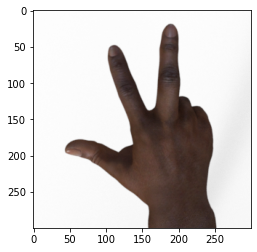

In [150]:
import matplotlib.pyplot as plt
# image=train_images[0].reshape(300,300) #It doesnt like the (300,300,1) format

#For an RGB image:
rgb_image=np.array([example['image'].numpy() for example in ds_train.take(1)])
rgb_image=rgb_image[0]


# plt.imshow(image, cmap='Greys_r')
plt.imshow(rgb_image)
rgb_image.shape

## Convert PNG/JPG images to numpy format

In [155]:
import imageio

im=imageio.imread('https://www.afd.fr/sites/afd/files/styles/visuel_principal/public/2019-01-07-16-19/mangrove%20couv.jpg?itok=IGNV-r8C')
im_np=np.array(im)
im_np.shape

(750, 1680, 3)